<a href="https://colab.research.google.com/github/Afshan300/CODSOFT/blob/main/MLTask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CUSTOMER CHURN PREDICTION  Afshan Gudakuwala

from google.colab import files
uploaded = files.upload()


Saving archive (12).zip to archive (12).zip


In [ ]:
import zipfile, os

zip_name = list(uploaded.keys())[0]

extract_folder = "data"
os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

os.listdir("data")


['Churn_Modelling.csv']

In [ ]:
import pandas as pd

df = pd.read_csv("data/Churn_Modelling.csv")
df.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8105
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1607
           1       0.54      0.23      0.32       393

    accuracy                           0.81      2000
   macro avg       0.69      0.59      0.60      2000
weighted avg       0.78      0.81      0.78      2000



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.8665
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
sample_customer = X_test.iloc[0:1]
prediction = rf.predict(sample_customer)

print("Customer will CHURN ❌" if prediction[0] == 1 else "Customer will STAY ✅")


Customer will STAY ✅


In [ ]:
prob = rf.predict_proba(sample_customer)

print("Probability of Staying :", prob[0][0])
print("Probability of Churn   :", prob[0][1])


Probability of Staying : 0.98
Probability of Churn   : 0.02


In [ ]:
result = sample_customer.copy()
result['Churn_Probability'] = rf.predict_proba(sample_customer)[:,1]
result['Prediction'] = prediction
result['Prediction'] = result['Prediction'].map({0:'Stay', 1:'Churn'})

result


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Churn_Probability,Prediction
6252,596,32,3,96709.07,2,0,0,41788.37,True,False,True,0.02,Stay


In [ ]:
multiple_customers = X_test.iloc[0:5]
preds = rf.predict(multiple_customers)

for i, p in enumerate(preds):
    print(f"Customer {i+1}:", "Churn ❌" if p == 1 else "Stay ✅")


Customer 1: Stay ✅
Customer 2: Stay ✅
Customer 3: Stay ✅
Customer 4: Stay ✅
Customer 5: Stay ✅


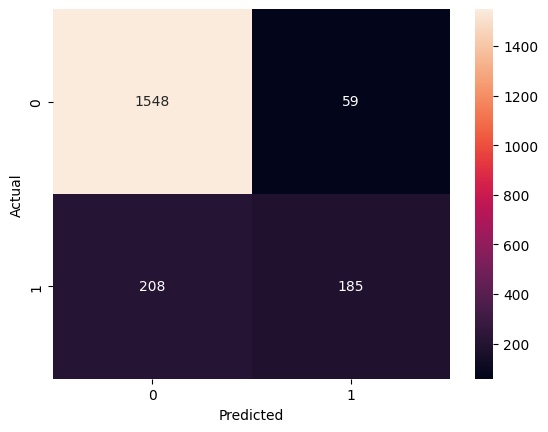

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf.predict(X_test))

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pandas as pd

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance.head(10)


,Feature,Importance
1,Age,0.236922
7,EstimatedSalary,0.147558
0,CreditScore,0.143338
3,Balance,0.141612
4,NumOfProducts,0.131486
2,Tenure,0.082080
6,IsActiveMember,0.040725
8,Geography_Germany,0.026190
5,HasCrCard,0.018454
10,Gender_Male,0.018421


In [ ]:
import joblib

joblib.dump(rf, "churn_model.pkl")
joblib.dump(X.columns, "model_features.pkl")


['model_features.pkl']